In [1]:
%matplotlib widget

from gamesopt.train import train, TrainConfig
from gamesopt.games import load_game, GameOptions, QuadraticGameConfig, GameType
from gamesopt.optimizer import load_optimizer, OptimizerOptions, OptimizerType
from gamesopt.optimizer.aggregation import AggregationOptions, AggregatorType
import torch
from collections import defaultdict
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 1


In [2]:
n_iter = 100

n_total = 10
n_byzan = 2

num_samples = 10
dim = 2
bias = True
mu = 1.
ell = 10.

aggregator_type=AggregatorType.Mean
use_bucketing = False#not implemented

optimizer_type=OptimizerType.SGDARA
lr = 5e-4
batch_size = 10

In [3]:
aggregation_options = AggregationOptions(n_total=n_total,
                                         n_byzan=n_byzan,
                                         aggregator_type=aggregator_type)

quadratic_game_options = QuadraticGameConfig(num_samples=num_samples,
                                             dim=dim,
                                            num_players=2,
                                            bias=bias,
                                            mu=mu,
                                            ell=ell)

game_options = GameOptions(GameType.QUADRATIC, quadratic_game_options)

           
optimizer_options = OptimizerOptions(optimizer_type=optimizer_type,
                                     lr=lr,
                                     batch_size=batch_size,
                                     aggregation_options=aggregation_options)

config = TrainConfig(game=game_options,
                     optimizer=optimizer_options,
                     num_iter=n_iter)

TrainConfig(game=GameOptions(game_type=<GameType.QUADRATIC: 'quadratic'>, quadratic_options=QuadraticGameConfig(num_samples=10, dim=2, num_players=2, bias=True, mu=1.0, ell=10.0, importance_sampling=False, matrix=None)), optimizer=OptimizerOptions(optimizer_type=<OptimizerType.SGDARA: 'SGDARA'>, lr=0.0005, batch_size=10, aggregation_options=AggregationOptions(n_total=10, n_byzan=2, aggregator_type=<AggregatorType.Mean: 'Mean'>)), num_iter=100)


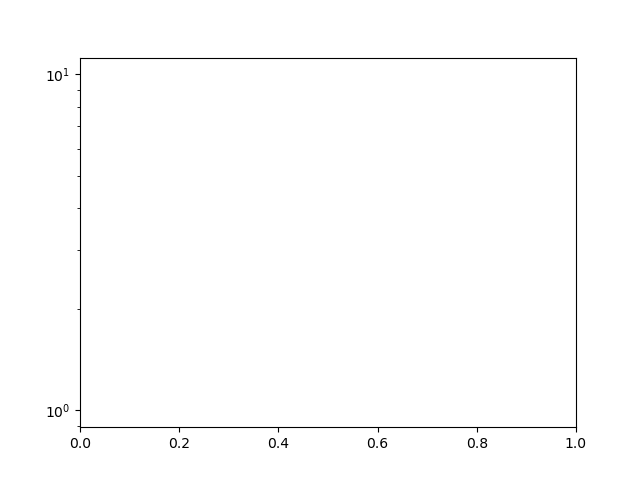

In [4]:
# config = TrainConfig()
# config.game.quadratic_options.num_samples = 100
# config.game.quadratic_options.dim = 10
# config.num_iter = 2000
# config.game.quadratic_options.bias = True
print(config)

plt.figure()
plt.yscale('log')

In [5]:
config.optimizer.lr = 2e-3
config.optimizer.optimizer_type = OptimizerType.PROX_SGDA
record = train(config)
metrics = record.metrics
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

AttributeError: PROX_SGDA

In [9]:
config.optimizer.lr = 7e-3
config.optimizer.optimizer_type = OptimizerType.PROX_LSVRGDA
print(config.optimizer)
record = train(config)
metrics = record.metrics
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

OptimizerOptions(optimizer_type=<OptimizerType.PROX_LSVRGDA: 'Prox-L-SVRGDA'>, lr=0.007, lr_e=None, p=None, alpha=None, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.NONE: 'none'>, k=5))
Init...


In [10]:
config.optimizer.lr = 7e-3
config.optimizer.optimizer_type = OptimizerType.SVRG
print(config.optimizer)
record = train(config)
metrics = record.metrics
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

OptimizerOptions(optimizer_type=<OptimizerType.SVRG: 'SVRG'>, lr=0.007, lr_e=None, p=None, alpha=None, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.NONE: 'none'>, k=5))
Init...


In [11]:
config.optimizer.lr = 2e-3
config.optimizer.optimizer_type = OptimizerType.VRFORB
print(config.optimizer)
record = train(config)
metrics = record.metrics
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

OptimizerOptions(optimizer_type=<OptimizerType.VRFORB: 'VR-FoRB'>, lr=0.002, lr_e=None, p=None, alpha=None, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.NONE: 'none'>, k=5))
Init...


In [12]:
config.optimizer.lr = 2e-2
config.optimizer.optimizer_type = OptimizerType.VRAGDA
config.optimizer.T = 1
print(config.optimizer)
record = train(config)
metrics = record.metrics
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

OptimizerOptions(optimizer_type=<OptimizerType.VRAGDA: 'VR-AGDA'>, lr=0.02, lr_e=None, p=None, alpha=None, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.NONE: 'none'>, k=5))
Init...


In [13]:
config.optimizer.lr = 2e-2
config.optimizer.optimizer_type = OptimizerType.SVRE
print(config.optimizer)
record = train(config)
metrics = record.metrics
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

OptimizerOptions(optimizer_type=<OptimizerType.SVRE: 'SVRE'>, lr=0.02, lr_e=None, p=None, alpha=None, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.NONE: 'none'>, k=5))
Init...


In [14]:
config.optimizer.lr = 1e-1
config.optimizer.optimizer_type = OptimizerType.EG_VR
print(config.optimizer)
record = train(config)
metrics = record.metrics
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

OptimizerOptions(optimizer_type=<OptimizerType.EG_VR: 'EG-VR'>, lr=0.1, lr_e=None, p=None, alpha=None, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.NONE: 'none'>, k=5))
Init...


In [15]:
plt.legend()
plt.show()